# CS 541-A-Homework 3
## Neural networks


---


### ***Fill your details below***
### Name: Sneha Venkatesh
### CWID: 20027527
### Email ID: svenkate1@stevens.edu
### References: ***Cite your references here***


---
### Submission guidelines:

#### 1. Submit this notebook along with its PDF version. You can do this by clicking File->Print->"Save as PDF"

#### 2. Name the file as "<mailID_HWnumber.extension>". For example, mailID is abcdefg @stevens.edu then name the files as abcdefg_HW1.ipynb and abcdefg_HW1.pdf.

#### 3. Please do not Zip your files.


---



In [16]:
#@title Installing Pytorch

!pip install torch
!pip install torchvision

In [17]:
#@title Import Dependencies

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [18]:
#@title Define Hyperparameters

input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 500 # number of nodes at hidden layer
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 5 # number of times which the entire dataset is passed throughout the model
batch_size = 100 # the size of input data took for one iteration
lr = 1e-3 # size of step

In [19]:
#@title Downloading MNIST data

train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

In [20]:
#@title Loading the data

train_gen = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_gen = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size,
                                      shuffle = False)

First 5 images in train dataset:


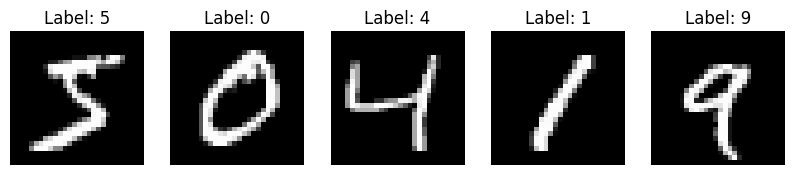


First 5 images in test dataset:


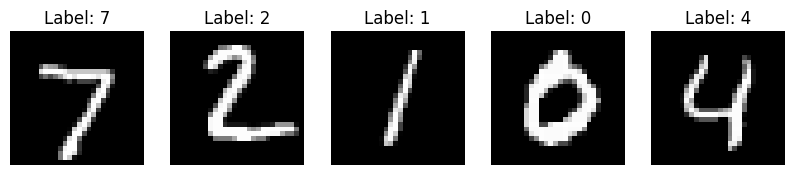

In [21]:
import matplotlib.pyplot as plt

transform = transforms.ToTensor()

print("First 5 images in train dataset:")
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    image, label = train_data[i]
    axes[i].imshow(image.squeeze().numpy(), cmap='gray')
    axes[i].set_title('Label: {}'.format(label))
    axes[i].axis('off')
plt.show()

print("\nFirst 5 images in test dataset:")
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    image, label = test_data[i]
    axes[i].imshow(image.squeeze().numpy(), cmap='gray')
    axes[i].set_title('Label: {}'.format(label))
    axes[i].axis('off')
plt.show()


## Q1. (50 points): design a neural network, provide justification.

PyTorch neural network documentation: https://pytorch.org/docs/stable/nn.html

In [22]:
#@title Define model class

class Net(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Net,self).__init__()
    ''' code to build the model '''
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)


  def forward(self,x):
    ''' code to define the forward pass '''
    out = self.fc1(x)
    out = self.relu(out)
    output = self.fc2(out)
    return output

In [23]:
#@title Build the model

net = Net(input_size, hidden_size, num_classes)
if torch.cuda.is_available():
  net.cuda()

In [24]:
#@title Define loss-function & optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

##Q2.

##a) In the code provided below, What is the meaning of the "loss.backward()" step? Please explain the functionality. (15 pts)

##b) What is the meaning of "optimizer.step()" and what does it do? (15 pts)

In [25]:
#@title Training the model

for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_gen):
    images = Variable(images.view(-1,28*28))
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward() #Q2a (15 points): What is the meaning of this step? Please explain the functionality.
    optimizer.step() #Q2b (15 points): What is the meaning of this step? Please explain the functionality.

    if (i+1) % 100 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'%(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.4093
Epoch [1/5], Step [200/600], Loss: 0.2264
Epoch [1/5], Step [300/600], Loss: 0.2733
Epoch [1/5], Step [400/600], Loss: 0.2714
Epoch [1/5], Step [500/600], Loss: 0.1924
Epoch [1/5], Step [600/600], Loss: 0.1618
Epoch [2/5], Step [100/600], Loss: 0.1369
Epoch [2/5], Step [200/600], Loss: 0.1461
Epoch [2/5], Step [300/600], Loss: 0.0674
Epoch [2/5], Step [400/600], Loss: 0.0785
Epoch [2/5], Step [500/600], Loss: 0.0352
Epoch [2/5], Step [600/600], Loss: 0.1625
Epoch [3/5], Step [100/600], Loss: 0.0242
Epoch [3/5], Step [200/600], Loss: 0.0697
Epoch [3/5], Step [300/600], Loss: 0.2257
Epoch [3/5], Step [400/600], Loss: 0.1261
Epoch [3/5], Step [500/600], Loss: 0.1763
Epoch [3/5], Step [600/600], Loss: 0.0440
Epoch [4/5], Step [100/600], Loss: 0.0742
Epoch [4/5], Step [200/600], Loss: 0.0387
Epoch [4/5], Step [300/600], Loss: 0.1057
Epoch [4/5], Step [400/600], Loss: 0.0249
Epoch [4/5], Step [500/600], Loss: 0.0534
Epoch [4/5], Step [600/600], Loss:

loss.backward() - computes gradients of loss function with respect to the model parameters and are later used for updating parameters during training via gradient descent or other similar algorithms.

optimizer.step() - This will update the model parameters based on the computed gradients and the chosen optimization algorithm (Adam optimizer in above case). It's essentially performing a gradient descent step to minimize the loss.

#Q3 (20 points): Discuss the results. Is the neural network doing a good job?

In [26]:
#@title Evaluating the accuracy of the model

correct = 0
total = 0
for images,labels in test_gen:
  images = Variable(images.view(-1,28*28))
  labels = labels

  output = net(images)
  _, predicted = torch.max(output,1)
  correct += (predicted == labels).sum()
  total += labels.size(0)

print('Accuracy of the model: %.3f %%' %((100*correct)/(total+1)))
#Q3 (20 points): How to interpret the results? Is the neural network does a good job?

Accuracy of the model: 97.920 %


accuracy is around 97.3 to 98.3 using above model

Above is a neural network model with one hidden layer and ReLU activation function

In [13]:
def build_model(input_size, hidden_size, num_classes, num_layers, activations):
    layers = []
    layers.append(nn.Linear(input_size, hidden_size))
    for i in range(num_layers):
        activation = activations[i] if i < len(activations) else 'relu'
        if activation == 'relu':
            layers.append(nn.ReLU())
        elif activation == 'sigmoid':
            layers.append(nn.Sigmoid())
        elif activation == 'tanh':
            layers.append(nn.Tanh())
        elif activation == 'softmax':
            layers.append(nn.Softmax())
        layers.append(nn.Linear(hidden_size, hidden_size))
    layers.append(nn.Linear(hidden_size, num_classes))
    return nn.Sequential(*layers)

activations = ['relu', 'relu', 'relu', 'relu']
net = build_model(input_size, hidden_size, num_classes, num_layers=1, activations=activations)

if torch.cuda.is_available():
  net.cuda()


#@title function to evaluate different activation functions and different number of layers

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

#@title Training the model

for epoch in range(num_epochs):
  for i ,(images,labels) in enumerate(train_gen):
    images = Variable(images.view(-1,28*28))
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs = net(images)
    loss = loss_function(outputs, labels)
    loss.backward() #Q2a (15 points): What is the meaning of this step? Please explain the functionality.
    optimizer.step() #Q2b (15 points): What is the meaning of this step? Please explain the functionality.

    if (i+1) % 100 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'%(epoch+1, num_epochs, i+1, len(train_data)//batch_size, loss.item()))


#@title Evaluating the accuracy of the model

correct = 0
total = 0
for images,labels in test_gen:
  images = Variable(images.view(-1,28*28))
  labels = labels

  output = net(images)
  _, predicted = torch.max(output,1)
  correct += (predicted == labels).sum()
  total += labels.size(0)

print('Accuracy of the model: %.3f %%' %((100*correct)/(total+1)))

Epoch [1/5], Step [100/600], Loss: 0.3478
Epoch [1/5], Step [200/600], Loss: 0.1650
Epoch [1/5], Step [300/600], Loss: 0.1820
Epoch [1/5], Step [400/600], Loss: 0.0816
Epoch [1/5], Step [500/600], Loss: 0.1511
Epoch [1/5], Step [600/600], Loss: 0.1417
Epoch [2/5], Step [100/600], Loss: 0.0391
Epoch [2/5], Step [200/600], Loss: 0.0725
Epoch [2/5], Step [300/600], Loss: 0.0300
Epoch [2/5], Step [400/600], Loss: 0.1114
Epoch [2/5], Step [500/600], Loss: 0.0522
Epoch [2/5], Step [600/600], Loss: 0.0707
Epoch [3/5], Step [100/600], Loss: 0.0159
Epoch [3/5], Step [200/600], Loss: 0.0361
Epoch [3/5], Step [300/600], Loss: 0.0106
Epoch [3/5], Step [400/600], Loss: 0.0616
Epoch [3/5], Step [500/600], Loss: 0.1423
Epoch [3/5], Step [600/600], Loss: 0.0725
Epoch [4/5], Step [100/600], Loss: 0.0285
Epoch [4/5], Step [200/600], Loss: 0.0408
Epoch [4/5], Step [300/600], Loss: 0.0471
Epoch [4/5], Step [400/600], Loss: 0.0116
Epoch [4/5], Step [500/600], Loss: 0.0177
Epoch [4/5], Step [600/600], Loss:

activations = ['relu', 'sigmoid', 'tanh', 'softmax']
net = build_model(input_size, hidden_size, num_classes, num_layers=4, activations=activations)
Accuracy of the model: 97.120 %

activations = ['relu', 'sigmoid', 'tanh', 'softmax']
net = build_model(input_size, hidden_size, num_classes, num_layers=3, activations=activations)
Accuracy of the model: 97.600 %

activations = ['relu', 'relu', 'relu', 'relu']
net = build_model(input_size, hidden_size, num_classes, num_layers=3, activations=activations)
Accuracy of the model: 97.740 %

activations = ['relu', 'relu', 'relu', 'relu']
net = build_model(input_size, hidden_size, num_classes, num_layers=4, activations=activations)
Accuracy of the model: 97.850 %

activations = ['relu', 'relu', 'relu', 'relu']
net = build_model(input_size, hidden_size, num_classes, num_layers=6, activations=activations)
accuracy - 97.660%

relu with 1 layer; accuracy - 97.680%

above code checks model for different layers and activation functions. Model can be updated accordingly as below which has 3 layers and 'relu' on each layer. Functions and number of layers can be added accordingly.

In [14]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        output = self.fc3(out)
        return output

In [15]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

#@title CNN implementation

input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 5 # number of times which the entire dataset is passed throughout the model
batch_size = 100 # the size of input data took for one iteration
lr = 1e-3 # size of step

#@title Downloading MNIST data

train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

#@title Define model class

class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(7 * 7 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

#@title CNN implementation

net = Net(num_classes)
if torch.cuda.is_available():
  net.cuda()

#@title Define loss-function & optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

#@title Training the model

train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=batch_size,
                                           shuffle=True)

total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = net(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                  %(epoch+1, num_epochs, i+1, total_step, loss.item()))

#@title Evaluating the accuracy of the model

test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=batch_size,
                                          shuffle=False)

correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images)
    labels = labels

    output = net(images)
    _, predicted = torch.max(output.data, 1)
    correct += (predicted == labels).sum()
    total += labels.size(0)

print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Epoch [1/5], Step [100/600], Loss: 0.2079
Epoch [1/5], Step [200/600], Loss: 0.0920
Epoch [1/5], Step [300/600], Loss: 0.0469
Epoch [1/5], Step [400/600], Loss: 0.0560
Epoch [1/5], Step [500/600], Loss: 0.0944
Epoch [1/5], Step [600/600], Loss: 0.0161
Epoch [2/5], Step [100/600], Loss: 0.0877
Epoch [2/5], Step [200/600], Loss: 0.0248
Epoch [2/5], Step [300/600], Loss: 0.1439
Epoch [2/5], Step [400/600], Loss: 0.0775
Epoch [2/5], Step [500/600], Loss: 0.0538
Epoch [2/5], Step [600/600], Loss: 0.1182
Epoch [3/5], Step [100/600], Loss: 0.0519
Epoch [3/5], Step [200/600], Loss: 0.0154
Epoch [3/5], Step [300/600], Loss: 0.0112
Epoch [3/5], Step [400/600], Loss: 0.0476
Epoch [3/5], Step [500/600], Loss: 0.0091
Epoch [3/5], Step [600/600], Loss: 0.0200
Epoch [4/5], Step [100/600], Loss: 0.0204
Epoch [4/5], Step [200/600], Loss: 0.0508
Epoch [4/5], Step [300/600], Loss: 0.0470
Epoch [4/5], Step [400/600], Loss: 0.0452
Epoch [4/5], Step [500/600], Loss: 0.0829
Epoch [4/5], Step [600/600], Loss:

CNN model with 2 convolutional layers; used ReLU activation functions and max pooling layers.
initial accuracy - 98%

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

#@title Define Hyperparameters

input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
num_classes = 10 # number of output classes discrete range [0,9]
num_epochs = 5 # number of times which the entire dataset is passed throughout the model
batch_size = 100 # the size of input data took for one iteration
lr = 1e-3 # size of step

#@title Downloading MNIST data

train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

#@title Define model class

class Net(nn.Module):
    def __init__(self, num_classes, activation='relu', pooling='max'):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        elif activation == 'tanh':
            self.activation = nn.Tanh()
        elif activation == 'softmax':
            self.activation = nn.Softmax()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2) if pooling == 'max' else nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(7 * 7 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.activation(out)
        out = self.maxpool(out)
        out = self.conv2(out)
        out = self.activation(out)
        out = self.maxpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.activation(out)
        out = self.fc2(out)
        return out

#@title Build and Train the model

def train_model(activation, pooling):
    net = Net(num_classes, activation, pooling)
    if torch.cuda.is_available():
        net.cuda()

    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)

    train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                               batch_size=batch_size,
                                               shuffle=True)

    total_step = len(train_loader)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
            images = Variable(images)
            labels = Variable(labels)

            optimizer.zero_grad()
            outputs = net(images)
            loss = loss_function(outputs, labels)
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                      %(epoch+1, num_epochs, i+1, total_step, loss.item()))

    test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                              batch_size=batch_size,
                                              shuffle=False)

    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images)
        labels = labels

        output = net(images)
        _, predicted = torch.max(output.data, 1)
        correct += (predicted == labels).sum()
        total += labels.size(0)

    accuracy = 100 * correct / total
    print('Accuracy of the model on the 10000 test images with activation {} and pooling {}: {} %'.format(activation, pooling, accuracy))

# Try different combinations of activation functions and pooling layers
activations = ['relu', 'sigmoid', 'tanh', 'softmax']
poolings = ['max', 'avg']

for activation in activations:
    for pooling in poolings:
        print("Training model with activation: {}, pooling: {}".format(activation, pooling))
        train_model(activation, pooling)


Training model with activation: relu, pooling: max
Epoch [1/5], Step [100/600], Loss: 0.2634
Epoch [1/5], Step [200/600], Loss: 0.0862
Epoch [1/5], Step [300/600], Loss: 0.0988
Epoch [1/5], Step [400/600], Loss: 0.2082
Epoch [1/5], Step [500/600], Loss: 0.0707
Epoch [1/5], Step [600/600], Loss: 0.0395
Epoch [2/5], Step [100/600], Loss: 0.1340
Epoch [2/5], Step [200/600], Loss: 0.0217
Epoch [2/5], Step [300/600], Loss: 0.0446
Epoch [2/5], Step [400/600], Loss: 0.0615
Epoch [2/5], Step [500/600], Loss: 0.0481
Epoch [2/5], Step [600/600], Loss: 0.0185
Epoch [3/5], Step [100/600], Loss: 0.1353
Epoch [3/5], Step [200/600], Loss: 0.0249
Epoch [3/5], Step [300/600], Loss: 0.0586
Epoch [3/5], Step [400/600], Loss: 0.0469
Epoch [3/5], Step [500/600], Loss: 0.0870
Epoch [3/5], Step [600/600], Loss: 0.0232
Epoch [4/5], Step [100/600], Loss: 0.0475
Epoch [4/5], Step [200/600], Loss: 0.0792
Epoch [4/5], Step [300/600], Loss: 0.0196
Epoch [4/5], Step [400/600], Loss: 0.0069
Epoch [4/5], Step [500/60

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch [1/5], Step [100/600], Loss: 2.3073
Epoch [1/5], Step [200/600], Loss: 2.1499
Epoch [1/5], Step [300/600], Loss: 1.9291
Epoch [1/5], Step [400/600], Loss: 1.7264
Epoch [1/5], Step [500/600], Loss: 1.6367
Epoch [1/5], Step [600/600], Loss: 1.5525
Epoch [2/5], Step [100/600], Loss: 1.3800
Epoch [2/5], Step [200/600], Loss: 1.3266
Epoch [2/5], Step [300/600], Loss: 1.2881
Epoch [2/5], Step [400/600], Loss: 1.2172
Epoch [2/5], Step [500/600], Loss: 1.2184
Epoch [2/5], Step [600/600], Loss: 1.0739
Epoch [3/5], Step [100/600], Loss: 1.1657
Epoch [3/5], Step [200/600], Loss: 1.1278
Epoch [3/5], Step [300/600], Loss: 1.1744
Epoch [3/5], Step [400/600], Loss: 1.1106
Epoch [3/5], Step [500/600], Loss: 1.1071
Epoch [3/5], Step [600/600], Loss: 1.0743
Epoch [4/5], Step [100/600], Loss: 0.9926
Epoch [4/5], Step [200/600], Loss: 0.9965
Epoch [4/5], Step [300/600], Loss: 1.0429
Epoch [4/5], Step [400/600], Loss: 0.9816
Epoch [4/5], Step [500/600], Loss: 0.9818
Epoch [4/5], Step [600/600], Loss:

only thing to be modified is modeland based on above values, ReLu activation function with max pooling worked best. If needed, changes can be made accordingly.

In [ ]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        # changes for different activation functions accordingly; nn.Softmax() - softmax function
        # nn.Sigmoid() -- sigmod function; nn.Tanh() -- hyperbolic tangent function
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        #self.maxpool = nn.AvgPool2d(kernel_size=2, stride=2)  -- average pooling
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(7 * 7 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.conv2(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out